In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.fft import fft, ifft

In [203]:
# Sampling frequency (Hz)
sample_freq = 250
# Pre-stimulus time (ms)
start_time = 500
start_idx = int(start_time * 250 / 1000)
# Total epoch time (ms)
total_time = 2840
# Index of wall power
wall_idx = 50 * ((total_time - start_time) / 1000)

data = np.zeros((8, 710, 2, 10, 12))
for i in range(1, 103):
    data += scipy.io.loadmat(f"data/mdpi_set/S{i:03}.mat")["data"]
data /= 103
data

array([[[[[62114.22985489, 62195.714762  , 62046.49365688, ...,
           62108.32465456, 62415.32953548, 61839.20445919],
          [64437.45571263, 64520.73353334, 64598.63608535, ...,
           64538.07848601, 64504.691492  , 64520.13329139],
          [65947.84025002, 65927.62298986, 65961.39321861, ...,
           66243.55901971, 66087.68968156, 66103.66358264],
          ...,
          [66116.61240314, 66030.32469236, 66167.19027469, ...,
           66121.20123771, 66137.68163363, 66110.54401339],
          [66052.67166132, 66066.14477126, 66065.65346693, ...,
           66033.72649746, 66141.2570445 , 66140.4059422 ],
          [65673.51752368, 65570.79629053, 65638.44959178, ...,
           65604.53874235, 65356.30332133, 65503.86779337]],

         [[ 5305.50132473,  5347.06732066,  5333.32121565, ...,
            5326.53974019,  5368.04584213,  5331.64809002],
          [ 5927.33680074,  5911.87677275,  5937.9441134 , ...,
            5878.28665999,  5984.91532504,  6010.68

In [204]:
data.shape

(8, 710, 2, 10, 12)

In [205]:
time_series = data[1, start_idx:, 1, 0, 1]
time_points = 1000 * np.arange(np.shape(time_series)[0]) / 250

In [206]:
time_series.shape

(585,)

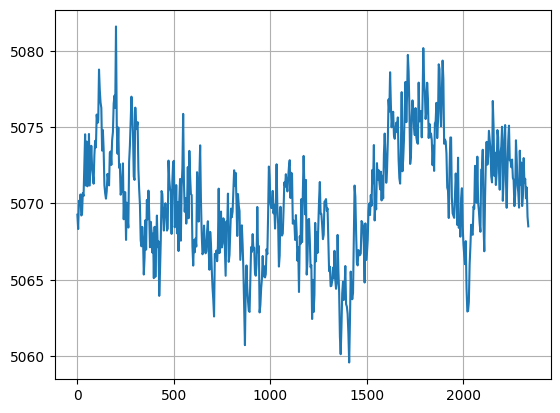

In [207]:
plt.plot(time_points, time_series)
plt.grid()
plt.show()

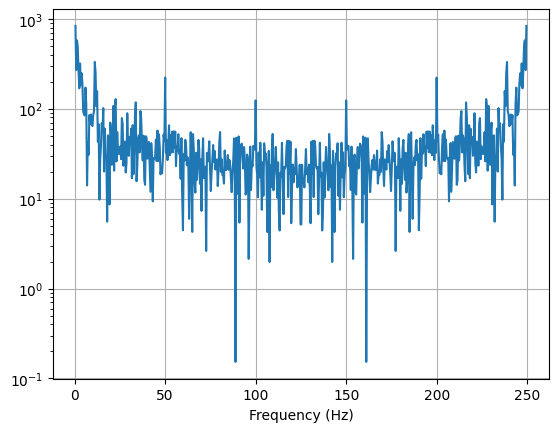

In [208]:
fig = plt.figure()

freq_points = np.arange(time_series.shape[0]) / ((total_time - start_time) / 1000)
freq_series = fft(time_series)

ax = fig.add_subplot(1, 1, 1)
ax.plot(freq_points[1:], np.abs(freq_series[1:]))
ax.set_xlabel("Frequency (Hz)")
ax.set_yscale("log")

plt.grid()
plt.show()

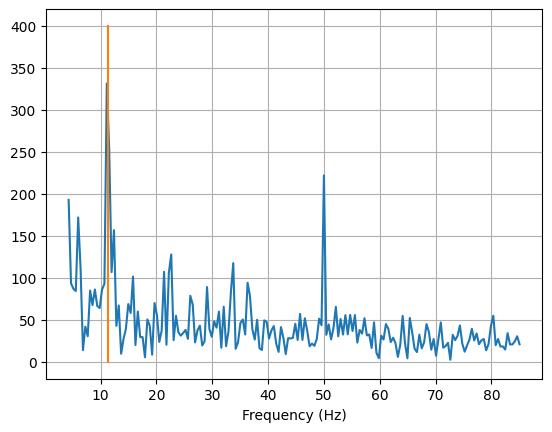

In [ ]:
fig = plt.figure()
freq_series = fft(time_series)

ax = fig.add_subplot(1, 1, 1)
end_idx = 200
ax.plot(freq_points[10:end_idx], np.abs(freq_series[10:end_idx]))
ax.set_xlabel("Frequency (Hz)")

plt.grid()
plt.show()